In [84]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [69]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')

In [70]:
train = np.load('fashion_train.npy')
test = np.load('fashion_test.npy')
def find_x_y(data):
    Y = data[:, -1]
    X = np.delete(data, -1, axis=1)
    return X, Y

label_dict = {0: 'T_shirtst', 1:'Trouseres', 2: 'Pullover', 3: 'Dress', 4: 'Shirt'}

train_x, train_y = find_x_y(train)
test_x, test_y = find_x_y(test)

Text(0, 0.5, 'Accuracy Score')

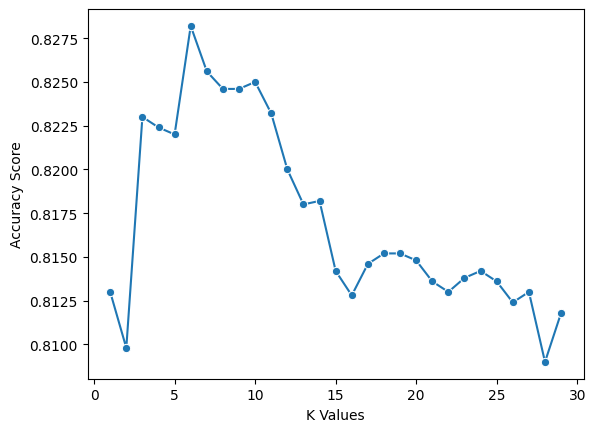

In [71]:
##Finding the best K
Ks=[i for i in range(1,30)]

train_accs=[]
test_accs=[]
for K in Ks:
    knn=KNeighborsClassifier(K)
    knn.fit(train_x,train_y)
    pred_y = knn.predict(test_x)
    acc_test = accuracy_score(test_y, pred_y)
    test_accs.append(acc_test)

sns.lineplot(x = Ks, y = test_accs, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [78]:
best_index = np.argmax(test_accs)
best_k = Ks[best_index]
best_k

6

In [73]:
knnK= KNeighborsClassifier(best_k).fit(train_x,train_y)

In [74]:
pred_y = knnK.predict(test_x)


In [81]:
print(classification_report(test_y,pred_y))

              precision    recall  f1-score   support

           0       0.75      0.88      0.81      1000
           1       0.99      0.95      0.97      1000
           2       0.78      0.86      0.82      1000
           3       0.92      0.88      0.90      1000
           4       0.71      0.56      0.62      1000

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



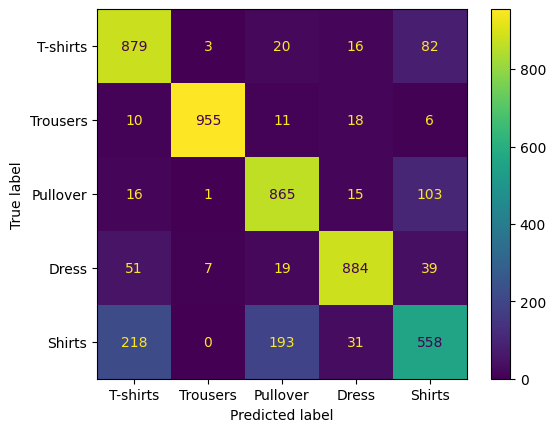

In [85]:
confusion_matrix=confusion_matrix(test_y,pred_y)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['T-shirts','Trousers','Pullover','Dress','Shirts'])
cm_display.plot()